In [16]:
from PIL import Image, ImageDraw

In [17]:
dartboard_filename = 'dart_board.png'

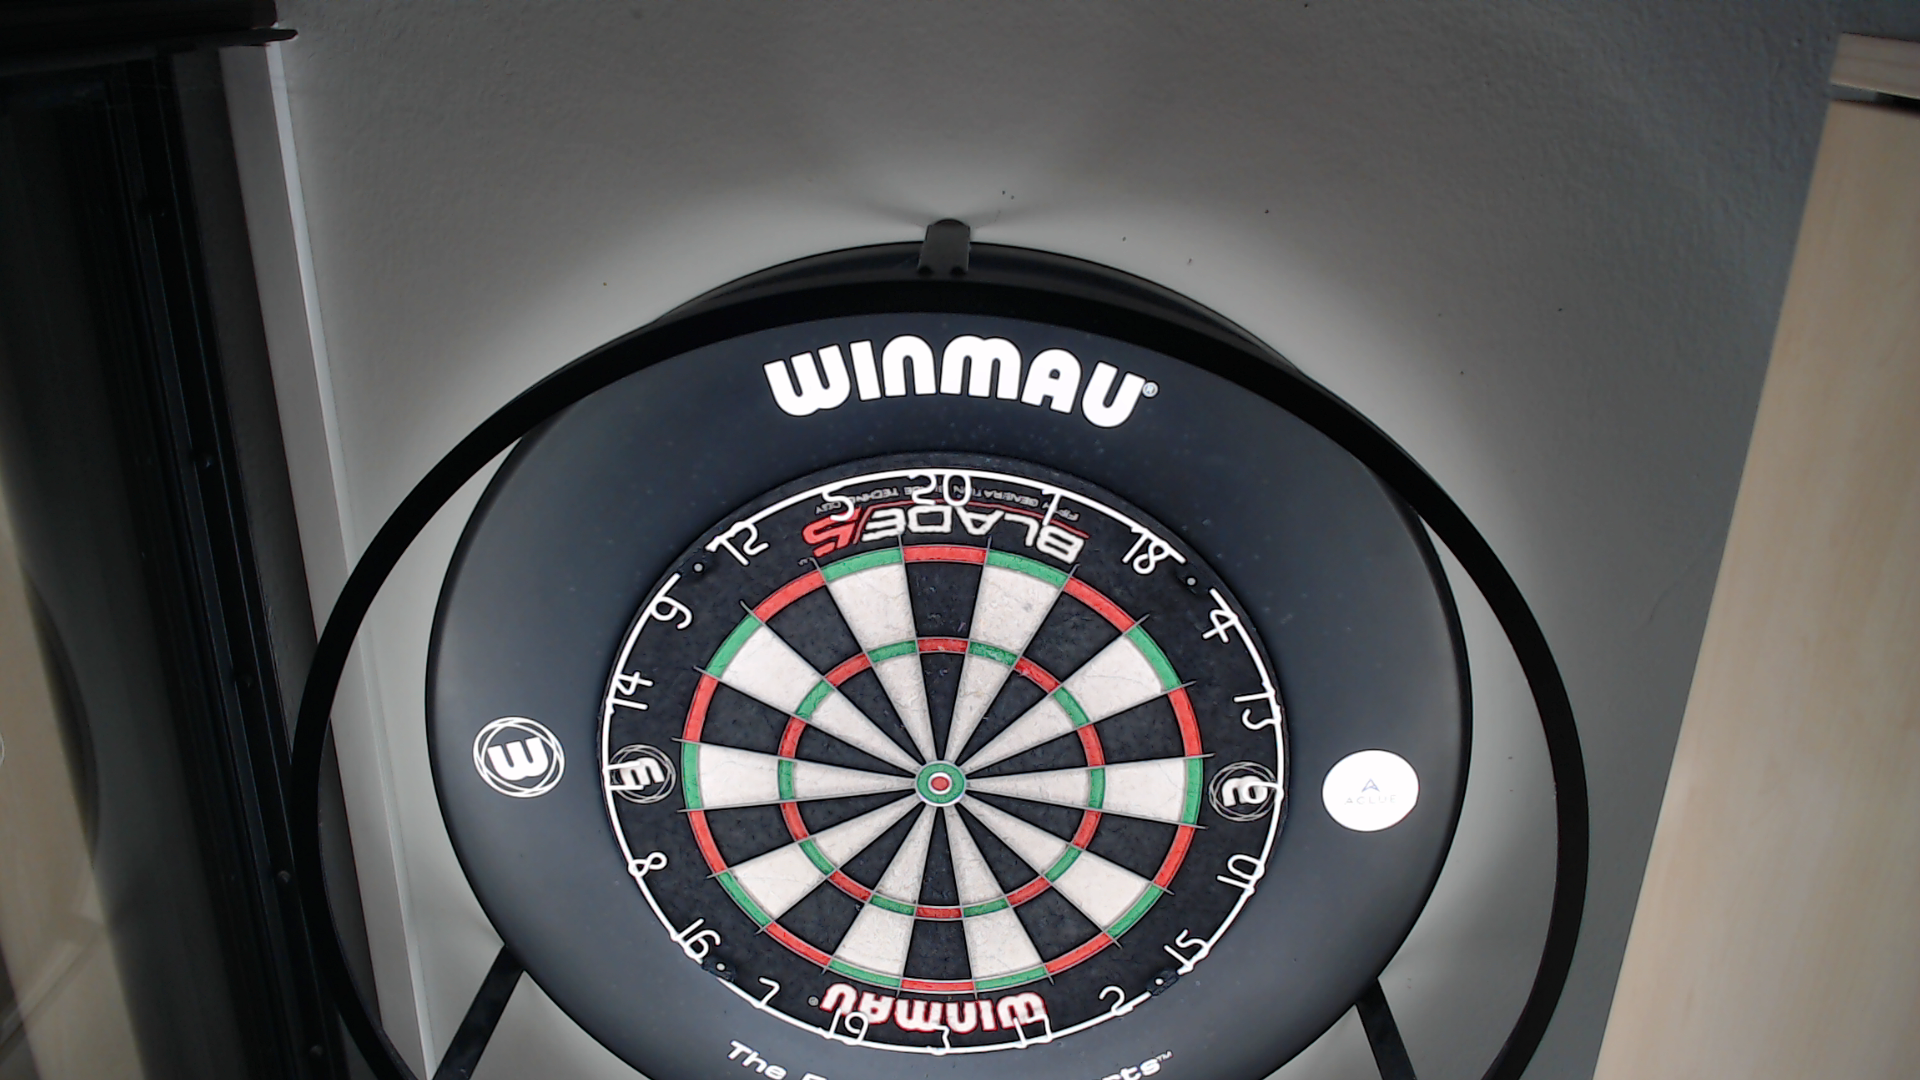

In [ ]:
dartboard_image = Image.open(dartboard_filename)
dartboard_image

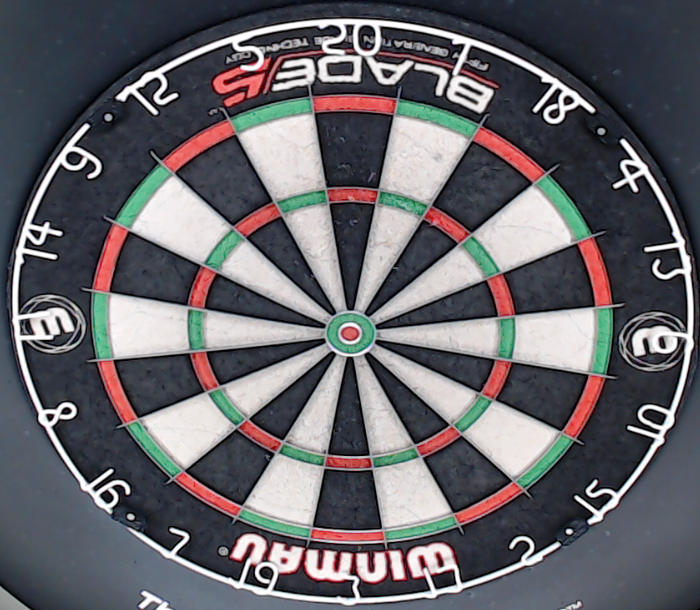

In [19]:
width, height = dartboard_image.size
left = 590
top = 450
right = width - 630
bottom = height - 20
cropped = dartboard_image.crop((left, top, right, bottom))
cropped

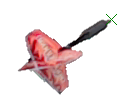

In [20]:
dart_1 = Image.open('dart_1.png')

# draw green x at dart top
def pos_to_lines(pos, line_length):
    x, y = pos
    return [
        ((x - line_length / 2, y - line_length / 2), (x + line_length / 2, y + line_length / 2)),
        ((x + line_length / 2, y - line_length / 2), (x - line_length / 2, y + line_length / 2))
    ]

line_length = 10
line_width = 1
pos_1 = (111, 19)

line_1, line_2 = pos_to_lines(pos_1, line_length)

dart_1_draw = ImageDraw.Draw(dart_1)
dart_1_draw.line(line_1, fill='green', width=line_width)
dart_1_draw.line(line_2, fill='green', width=line_width)
dart_1

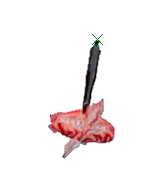

In [49]:
dart_2 = Image.open('dart_2.png')

pos_2 = (97, 39)
line_1, line_2 = pos_to_lines(pos_2, line_length)

dart_2_draw = ImageDraw.Draw(dart_2)
dart_2_draw.line(line_1, fill='green', width=line_width)
dart_2_draw.line(line_2, fill='green', width=line_width)
#dart_2_draw.line(((0,0), (0, dart_2.size[1])), fill='green', width=line_width)

dart_2

In [22]:
def composite_at(background, foreground, pos):
    if background.mode != 'RGBA':
        background = background.convert('RGBA')

    tmp_img = Image.new('RGBA', background.size, (0, 0, 0, 0))
    tmp_img.paste(foreground, pos)
    return Image.alpha_composite(background, tmp_img)

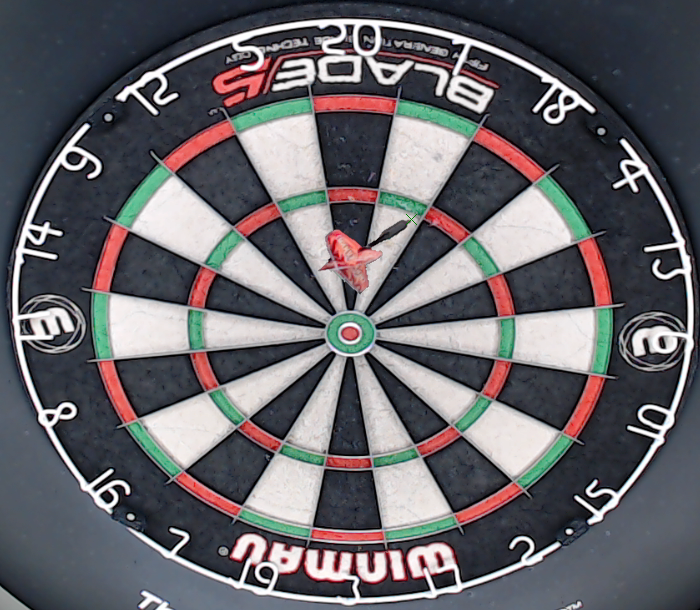

In [26]:
composite = composite_at(cropped, dart_1, (300, 200))
composite

In [51]:
def dart_position_in_cropped(pasted_at_pos, dart_top_pos):
    return (pasted_at_pos[0] + dart_top_pos[0], pasted_at_pos[1] + dart_top_pos[1])

def dart_position_in_original(cropped_at_pos, pasted_at_pos, dart_top_pos):
    return (cropped_at_pos[0] + pasted_at_pos[0] + dart_top_pos[0], cropped_at_pos[1] + pasted_at_pos[1] + dart_top_pos[1])

In [53]:
###
### generate data
###
import random
import csv

def random_positions(start_pos, end_pos):
    positions = []
    for i in range(3):
        x = random.randint(start_pos[0], end_pos[0])
        y = random.randint(start_pos[1], end_pos[1])
        positions.append((x, y))
    return positions

def cluster_positions_at_double():
    pass
def cluster_positions_at_triple():
    pass

save_location = 'data/'

num_images = 10
start_pos = (20, 20)
end_pos = cropped.size[0] - 20, cropped.size[1] - 20

dart_images = [dart_1, dart_2]
dart_top_positions = [pos_1, pos_2]


positions = []
for i in range(num_images):
    pos_1, pos_2, pos_3 = random_positions(start_pos, end_pos)

    dart_idx = random.randint(0, len(dart_images) - 1)
    dart_1 = dart_images[dart_idx]
    dart_1_top_pos = dart_top_positions[dart_idx]
    composite_1 = composite_at(cropped, dart_1, pos_1)

    dart_idx = random.randint(0, len(dart_images) - 1)
    dart_2 = dart_images[dart_idx]
    dart_2_top_pos = dart_top_positions[dart_idx]
    composite_2 = composite_at(composite_1, dart_2, pos_2)

    dart_idx = random.randint(0, len(dart_images) - 1)
    dart_3 = dart_images[dart_idx]
    dart_3_top_pos = dart_top_positions[dart_idx]
    composite_3 = composite_at(composite_2, dart_3, pos_3)
    
    dart_1_pos_in_cropped = dart_position_in_cropped(pos_1, dart_1_top_pos)
    dart_2_pos_in_cropped = dart_position_in_cropped(pos_2, dart_2_top_pos)
    dart_3_pos_in_cropped = dart_position_in_cropped(pos_3, dart_3_top_pos)
    positions.append((dart_1_pos_in_cropped, dart_2_pos_in_cropped, dart_3_pos_in_cropped))

    print(f'pos_1: {pos_1}, pos_2: {pos_2}, pos_3: {pos_3}')

    # save images as pngs
    composite_1.save(f'{save_location}dart_{i}_1.png')
    composite_2.save(f'{save_location}dart_{i}_2.png')
    composite_3.save(f'{save_location}dart_{i}_3.png')

with open(f'{save_location}positions.txt', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['dart_1', 'dart_2', 'dart_3'])
    for pos in positions:
        writer.writerow(pos)

pos_1: (174, 586), pos_2: (188, 400), pos_3: (141, 561)
pos_1: (676, 75), pos_2: (286, 468), pos_3: (557, 237)
pos_1: (420, 286), pos_2: (242, 537), pos_3: (410, 196)
pos_1: (567, 391), pos_2: (603, 204), pos_3: (638, 39)
pos_1: (463, 260), pos_2: (102, 242), pos_3: (407, 496)
pos_1: (98, 407), pos_2: (637, 277), pos_3: (582, 479)
pos_1: (99, 171), pos_2: (555, 278), pos_3: (70, 64)
pos_1: (279, 547), pos_2: (404, 281), pos_3: (454, 440)
pos_1: (30, 149), pos_2: (113, 24), pos_3: (347, 191)
pos_1: (270, 499), pos_2: (377, 578), pos_3: (386, 168)
